In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib import request

In [2]:
url = "https://www.jumia.co.ke/all-products/"
requests = requests.get(url)

In [3]:
## Parsing the html soup
soup = BeautifulSoup(requests.text,"html.parser")

In [4]:
items = soup.find_all("article", attrs = {"class":"prd _fb col c-prd"})

In [5]:
print(len(items))

40


In [6]:
print(items[0])

<article class="prd _fb col c-prd"><a class="btn _i _rnd -mas -fsh0 -me-start _wslt _sec" data-pop-open="addToWishlist" data-pop-trig="atw" data-simplesku="MI033FD24C9QRNAFAMZ-198233299" data-sku="MI033FD24C9QRNAFAMZ" data-track-onclick="wishlist" href="/customer/account/login/?tkWl=MI033FD24C9QRNAFAMZ-198233299&amp;return=%2Fall-products%2F" rel="nofollow"><svg aria-label="Add to wishlist" class="ic -f-or5" height="16" viewbox="0 0 24 24" width="16"><use xlink:href="https://www.jumia.co.ke/assets_he/images/i-icons.a66628fd.svg#saved-items"></use></svg></a><a class="core" data-ga4-item_brand="Miniso" data-ga4-item_category="Home &amp; Office" data-ga4-item_category2="Home &amp; Kitchen" data-ga4-item_category3="Home Decor" data-ga4-item_category4="Mirrors" data-ga4-item_category5="Vanity Mirrors" data-ga4-item_id="MI033FD24C9QRNAFAMZ" data-ga4-item_name="Mini Double Sided Hand-Held Vanity Mirror" data-ga4-list="" data-ga4-position="1" data-ga4-price="2.53" data-gtm-brand="Miniso" data-

In [7]:
first_items = items[0]
first_items_name =first_items.find("h3",attrs = {"class":"name"}).text

In [8]:
print(first_items_name)

Miniso Mini Double Sided Hand-Held Vanity Mirror


In [9]:
##price
first_items = items[0]
first_items_price = first_items.find("div", attrs = {"class":"prc"}).text

In [10]:
print(first_items_price)

KSh 359


In [23]:
first_items = items[0]
first_items_old_price = first_items.find("div", attrs = {"class":"old"})

In [24]:
print(first_items_old_price)

None


In [33]:
##discount
first_items = items[0]
first_items_discount = first_items.find("div", attrs = {"class":"bdg _dsct _sm"}).text

AttributeError: 'NoneType' object has no attribute 'text'

In [26]:
print(first_items_discount)

None


In [27]:
##product link
first_items = items[0]
first_items_link = first_items.find("a", attrs = {"class":"core"}).get("href")

In [28]:
print(first_items_link)

/miniso-mini-double-sided-hand-held-vanity-mirror-151332282.html


In [30]:
records = []
for item in items:
    try:
        item_name = item.find("h3", attrs={"class": "name"}).text
        current_price = item.find("div", attrs={"class": "prc"}).text
        old_price_element = item.find("div", attrs={"class": "old"})
        item_discount_element = item.find("div", attrs={"class": "bdg _dsct _sm"})
        item_link = item.find("a", attrs={"class": "core"}).get("href")

        if old_price_element:
            old_price = old_price_element.text
        else:
            old_price = None
        if item_discount_element:
            item_discount = item_discount_element.text
        else:
            item_discount = None
        records.append((item_name, current_price, old_price, item_discount, item_link))

    except AttributeError:
        records.append(None)

print(len(records))


40


In [31]:
records

[('Miniso Mini Double Sided Hand-Held Vanity Mirror',
  'KSh 359',
  None,
  None,
  '/miniso-mini-double-sided-hand-held-vanity-mirror-151332282.html'),
 ('Foldable Smart-phones & Tablets Desk Mount Stand Holder B2',
  'KSh 699',
  'KSh 1,098',
  '36%',
  '/generic-foldable-smart-phones-tablets-desk-mount-stand-holder-b2-61649600.html'),
 ('WD Purple 1TB Surveillance Hard Disk Drive - SATA 64MB 3.5 Inch',
  'KSh 4,980',
  'KSh 7,880',
  '37%',
  '/wd-purple-1tb-surveillance-hard-disk-drive-sata-64mb-3.5-inch-123215954.html'),
 ('11 Pieces Cake Icing / Pastry Bag Decorator Set',
  'KSh 750',
  None,
  None,
  '/generic-11-pieces-cake-icing-pastry-bag-decorator-set-139254032.html'),
 ('100 Pieces / Set Stainless Steel Shaft O-rings Round',
  'KSh 318',
  'KSh 445',
  '29%',
  '/generic-100-pieces-set-stainless-steel-shaft-o-rings-round-67992726.html'),
 ('Leak Seal Crack Repair Tape, Waterproof Water Tape',
  'KSh 850',
  None,
  None,
  '/generic-leak-seal-crack-repair-tape-waterproof-

In [32]:
import time
import requests
from bs4 import BeautifulSoup

base_url = "https://www.jumia.co.ke/all-products/?page={}#catalog-listing"
records = []

for page_number in range(1, 51):
    url = base_url.format(page_number)
    time.sleep(5)
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")
        print(f"Page {page_number} scrapped successfully")
        items = soup.find_all("article", attrs={"class": "prd _fb col c-prd"})
        for item in items:
            try:
                item_name = item.find("h3", attrs={"class": "name"}).text
                current_price = item.find("div", attrs={"class": "prc"}).text
                old_price_element = item.find("div", attrs={"class": "old"})
                item_discount_element = item.find("div", attrs={"class": "bdg _dsct _sm"})
                item_link = item.find("a", attrs={"class": "core"}).get("href")
                
                if old_price_element:
                    old_price = old_price_element.text
                else:
                    old_price = None
                if item_discount_element:
                    item_discount = item_discount_element.text
                else:
                    item_discount = None
                records.append((item_name, current_price, old_price, item_discount, item_link))
            except AttributeError:
                records.append(None)
    else:
        print(f"Page {page_number} not scrapped")

# Process records further as needed

Page 1 scrapped successfully
Page 2 scrapped successfully
Page 3 scrapped successfully
Page 4 scrapped successfully
Page 5 scrapped successfully
Page 6 scrapped successfully
Page 7 scrapped successfully
Page 8 scrapped successfully
Page 9 scrapped successfully
Page 10 scrapped successfully
Page 11 scrapped successfully
Page 12 scrapped successfully
Page 13 scrapped successfully
Page 14 scrapped successfully
Page 15 scrapped successfully
Page 16 scrapped successfully
Page 17 scrapped successfully
Page 18 scrapped successfully
Page 19 scrapped successfully
Page 20 scrapped successfully
Page 21 scrapped successfully
Page 22 scrapped successfully
Page 23 scrapped successfully
Page 24 scrapped successfully
Page 25 scrapped successfully
Page 26 scrapped successfully
Page 27 scrapped successfully
Page 28 scrapped successfully
Page 29 scrapped successfully
Page 30 scrapped successfully
Page 31 scrapped successfully
Page 32 scrapped successfully
Page 33 scrapped successfully
Page 34 scrapped su

In [34]:
len(records)

2000

In [35]:
data = pd.DataFrame(records, columns =["item_name","current_price","old_price_element","item_discount_element","item_link"])

In [36]:
data.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
0,Miniso Mini Double Sided Hand-Held Vanity Mirror,KSh 359,None,None,/miniso-mini-double-sided-hand-held-vanity-mir...
1,Foldable Smart-phones & Tablets Desk Mount Sta...,KSh 699,"KSh 1,098",36%,/generic-foldable-smart-phones-tablets-desk-mo...
2,WD Purple 1TB Surveillance Hard Disk Drive - S...,"KSh 4,980","KSh 7,880",37%,/wd-purple-1tb-surveillance-hard-disk-drive-sa...
3,11 Pieces Cake Icing / Pastry Bag Decorator Set,KSh 750,None,None,/generic-11-pieces-cake-icing-pastry-bag-decor...
4,100 Pieces / Set Stainless Steel Shaft O-rings...,KSh 318,KSh 445,29%,/generic-100-pieces-set-stainless-steel-shaft-...


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   item_name              2000 non-null   object
 1   current_price          2000 non-null   object
 2   old_price_element      1913 non-null   object
 3   item_discount_element  1913 non-null   object
 4   item_link              2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [38]:
## filtering out prices that have a range
data['current_price'] = data['current_price'].apply(lambda x: x[4:] )

In [39]:
data = data.dropna()

In [40]:
data['old_price_element'] = data['old_price_element'].apply(lambda x: x[4:] )
data['item_discount_element'] = data['item_discount_element'].apply(lambda x: x[:2] )
data

,item_name,current_price,old_price_element,item_discount_element,item_link
1,Foldable Smart-phones & Tablets Desk Mount Sta...,699,"1,098",36,/generic-foldable-smart-phones-tablets-desk-mo...
2,WD Purple 1TB Surveillance Hard Disk Drive - S...,"4,980","7,880",37,/wd-purple-1tb-surveillance-hard-disk-drive-sa...
4,100 Pieces / Set Stainless Steel Shaft O-rings...,318,445,29,/generic-100-pieces-set-stainless-steel-shaft-...
7,Mouse Gaming Mouse Backlit Optical Mouse For C...,849,"1,499",43,/gaming-mouse-high-quality-colorful-mouse-gene...
8,BACKUP RITAR SOLAR BATTERY 200AH/20HRS Annive...,"26,500","35,500",25,/ritar-backup-ritar-solar-battery-200ah20hrs-a...
...,...,...,...,...,...
1995,915 Generation Beach Chair Cover,"32,074","59,337",46,/915-generation-beach-chair-cover-131663101.html
1996,915 Generation Motorcycle 3D Fiber Sticker Set...,"6,904","13,119",47,/915-generation-motorcycle-3d-fiber-sticker-se...
1997,Temperature Display Portable Keeps Cold And He...,"5,446","9,259",41,/generic-temperature-display-portable-keeps-co...
1998,Fashion 10mm Golden High Finish Men Vintage Wa...,"5,772","9,768",41,/fashion-10mm-golden-high-finish-men-vintage-w...


In [41]:
selected_rows = data[data['current_price'].str.contains('-')| data['old_price_element'].str.contains('-')]

selected_rows

,item_name,current_price,old_price_element,item_discount_element,item_link
914,Applicable to Teclast/Taiwan Electric T50 11-I...,"3,700 - KSh 4,144","4,292 - KSh 4,736",14,/generic-applicable-to-teclasttaiwan-electric-...
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,"4,896 - KSh 5,328","8,296 - KSh 9,028",41,/generic-baby-boys-suit-set-toddler-blazer-inf...
1182,Door top device hotel safety buckle lock trave...,740 - KSh 888,"1,231 - KSh 1,477",40,/generic-door-top-device-hotel-safety-buckle-l...
1267,5 Speed/ 6 Gear Car Shift Gear change lever kn...,"5,180 - KSh 5,328","5,920 - KSh 6,068",13,/generic-5-speed-6-gear-car-shift-gear-change-...
1332,Cross-border detachable RGB luminous head-moun...,"1,184 - KSh 1,480","1,971 - KSh 2,464",40,/generic-cross-border-detachable-rgb-luminous-...
1599,Hot T16 Wireless Bluetooth Headset 5.3 Led Dig...,"4,144 - KSh 4,884","5,624 - KSh 6,364",26,/generic-hot-t16-wireless-bluetooth-headset-5....
1658,Men's Big Size Casual Breathable Sports Runnin...,"4,592 - KSh 5,027","8,726 - KSh 9,552",47,/generic-mens-big-size-casual-breathable-sport...
1727,Women's Jogging Running Casual Sneakers shocka...,"7,037 - KSh 7,146","10,963",36,/generic-womens-jogging-running-casual-sneaker...


In [42]:
##split the columns with price ranges to only remain with one price value
##begin with the current price columns
split_values = selected_rows['current_price'].str.split('-', expand=True)

# Extract start_value and end_value from split_values
selected_rows.loc[:, 'price_start_value'] = split_values[0].str.strip()
selected_rows.loc[:, 'price_end_value'] = split_values[1].str.strip()

# Fill missing end_value with start_value
selected_rows['price_end_value'].fillna(selected_rows['price_start_value'], inplace=True)

selected_rows

C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\3716473462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'price_start_value'] = split_values[0].str.strip()
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\3716473462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'price_end_value'] = split_values[1].str.strip()
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\3716473462.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,item_name,current_price,old_price_element,item_discount_element,item_link,price_start_value,price_end_value
914,Applicable to Teclast/Taiwan Electric T50 11-I...,"3,700 - KSh 4,144","4,292 - KSh 4,736",14,/generic-applicable-to-teclasttaiwan-electric-...,"3,700","KSh 4,144"
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,"4,896 - KSh 5,328","8,296 - KSh 9,028",41,/generic-baby-boys-suit-set-toddler-blazer-inf...,"4,896","KSh 5,328"
1182,Door top device hotel safety buckle lock trave...,740 - KSh 888,"1,231 - KSh 1,477",40,/generic-door-top-device-hotel-safety-buckle-l...,740,KSh 888
1267,5 Speed/ 6 Gear Car Shift Gear change lever kn...,"5,180 - KSh 5,328","5,920 - KSh 6,068",13,/generic-5-speed-6-gear-car-shift-gear-change-...,"5,180","KSh 5,328"
1332,Cross-border detachable RGB luminous head-moun...,"1,184 - KSh 1,480","1,971 - KSh 2,464",40,/generic-cross-border-detachable-rgb-luminous-...,"1,184","KSh 1,480"
1599,Hot T16 Wireless Bluetooth Headset 5.3 Led Dig...,"4,144 - KSh 4,884","5,624 - KSh 6,364",26,/generic-hot-t16-wireless-bluetooth-headset-5....,"4,144","KSh 4,884"
1658,Men's Big Size Casual Breathable Sports Runnin...,"4,592 - KSh 5,027","8,726 - KSh 9,552",47,/generic-mens-big-size-casual-breathable-sport...,"4,592","KSh 5,027"
1727,Women's Jogging Running Casual Sneakers shocka...,"7,037 - KSh 7,146","10,963",36,/generic-womens-jogging-running-casual-sneaker...,"7,037","KSh 7,146"


In [43]:
##old price column
split_values = selected_rows['old_price_element'].str.split('-', expand=True)

# Extract start_value and end_value from split_values
selected_rows.loc[:, 'old_price_start_value'] = split_values[0].str.strip()
selected_rows.loc[:, 'old_price_end_value'] = split_values[1].str.strip()

# Fill missing end_value with start_value
selected_rows['old_price_end_value'].fillna(selected_rows['old_price_start_value'], inplace=True)

selected_rows

C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\3216186134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'old_price_start_value'] = split_values[0].str.strip()
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\3216186134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.loc[:, 'old_price_end_value'] = split_values[1].str.strip()
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\3216186134.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,item_name,current_price,old_price_element,item_discount_element,item_link,price_start_value,price_end_value,old_price_start_value,old_price_end_value
914,Applicable to Teclast/Taiwan Electric T50 11-I...,"3,700 - KSh 4,144","4,292 - KSh 4,736",14,/generic-applicable-to-teclasttaiwan-electric-...,"3,700","KSh 4,144","4,292","KSh 4,736"
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,"4,896 - KSh 5,328","8,296 - KSh 9,028",41,/generic-baby-boys-suit-set-toddler-blazer-inf...,"4,896","KSh 5,328","8,296","KSh 9,028"
1182,Door top device hotel safety buckle lock trave...,740 - KSh 888,"1,231 - KSh 1,477",40,/generic-door-top-device-hotel-safety-buckle-l...,740,KSh 888,"1,231","KSh 1,477"
1267,5 Speed/ 6 Gear Car Shift Gear change lever kn...,"5,180 - KSh 5,328","5,920 - KSh 6,068",13,/generic-5-speed-6-gear-car-shift-gear-change-...,"5,180","KSh 5,328","5,920","KSh 6,068"
1332,Cross-border detachable RGB luminous head-moun...,"1,184 - KSh 1,480","1,971 - KSh 2,464",40,/generic-cross-border-detachable-rgb-luminous-...,"1,184","KSh 1,480","1,971","KSh 2,464"
1599,Hot T16 Wireless Bluetooth Headset 5.3 Led Dig...,"4,144 - KSh 4,884","5,624 - KSh 6,364",26,/generic-hot-t16-wireless-bluetooth-headset-5....,"4,144","KSh 4,884","5,624","KSh 6,364"
1658,Men's Big Size Casual Breathable Sports Runnin...,"4,592 - KSh 5,027","8,726 - KSh 9,552",47,/generic-mens-big-size-casual-breathable-sport...,"4,592","KSh 5,027","8,726","KSh 9,552"
1727,Women's Jogging Running Casual Sneakers shocka...,"7,037 - KSh 7,146","10,963",36,/generic-womens-jogging-running-casual-sneaker...,"7,037","KSh 7,146","10,963","10,963"


In [44]:
selected_rows.drop(['current_price','old_price_element'],axis = 1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\1709597164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.drop(['current_price','old_price_element'],axis = 1,inplace=True)


In [45]:
columns_to_convert = ['price_start_value', 'price_end_value', 'old_price_start_value', 'old_price_end_value']

# Function to convert string values to float, handling 'KSh' and commas
def convert_to_float(value):
    if isinstance(value, str):
        if 'KSh' in value:
            value = value.replace('KSh', '').replace(',', '').strip()
        else:
            value = value.replace(',', '').strip()
    return pd.to_numeric(value, errors='coerce')

# Convert values in specified columns to float
for column in columns_to_convert:
    selected_rows[column] = selected_rows[column].apply(convert_to_float)
selected_rows

C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\1611824524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows[column] = selected_rows[column].apply(convert_to_float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\1611824524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows[column] = selected_rows[column].apply(convert_to_float)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\1611824524.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,item_name,item_discount_element,item_link,price_start_value,price_end_value,old_price_start_value,old_price_end_value
914,Applicable to Teclast/Taiwan Electric T50 11-I...,14,/generic-applicable-to-teclasttaiwan-electric-...,3700,4144,4292,4736
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,41,/generic-baby-boys-suit-set-toddler-blazer-inf...,4896,5328,8296,9028
1182,Door top device hotel safety buckle lock trave...,40,/generic-door-top-device-hotel-safety-buckle-l...,740,888,1231,1477
1267,5 Speed/ 6 Gear Car Shift Gear change lever kn...,13,/generic-5-speed-6-gear-car-shift-gear-change-...,5180,5328,5920,6068
1332,Cross-border detachable RGB luminous head-moun...,40,/generic-cross-border-detachable-rgb-luminous-...,1184,1480,1971,2464
1599,Hot T16 Wireless Bluetooth Headset 5.3 Led Dig...,26,/generic-hot-t16-wireless-bluetooth-headset-5....,4144,4884,5624,6364
1658,Men's Big Size Casual Breathable Sports Runnin...,47,/generic-mens-big-size-casual-breathable-sport...,4592,5027,8726,9552
1727,Women's Jogging Running Casual Sneakers shocka...,36,/generic-womens-jogging-running-casual-sneaker...,7037,7146,10963,10963


In [46]:
selected_rows['current_price']=(selected_rows['price_start_value'] + selected_rows['price_end_value'])/2
selected_rows['old_price_element']=(selected_rows['old_price_start_value'] + selected_rows['old_price_end_value'])/2
selected_rows.head(2)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\2322384438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['current_price']=(selected_rows['price_start_value'] + selected_rows['price_end_value'])/2
C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\2322384438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['old_price_element']=(selected_rows['old_price_start_value'] + selected_rows['old_price_end_value'])/2


,item_name,item_discount_element,item_link,price_start_value,price_end_value,old_price_start_value,old_price_end_value,current_price,old_price_element
914,Applicable to Teclast/Taiwan Electric T50 11-I...,14,/generic-applicable-to-teclasttaiwan-electric-...,3700,4144,4292,4736,3922.0,4514.0
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,41,/generic-baby-boys-suit-set-toddler-blazer-inf...,4896,5328,8296,9028,5112.0,8662.0


In [47]:
selected_rows.drop(['price_start_value','price_end_value','old_price_start_value','old_price_end_value'],axis=1,inplace= True)
selected_rows.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9628\1953087594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows.drop(['price_start_value','price_end_value','old_price_start_value','old_price_end_value'],axis=1,inplace= True)


,item_name,item_discount_element,item_link,current_price,old_price_element
914,Applicable to Teclast/Taiwan Electric T50 11-I...,14,/generic-applicable-to-teclasttaiwan-electric-...,3922.0,4514.0
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,41,/generic-baby-boys-suit-set-toddler-blazer-inf...,5112.0,8662.0
1182,Door top device hotel safety buckle lock trave...,40,/generic-door-top-device-hotel-safety-buckle-l...,814.0,1354.0
1267,5 Speed/ 6 Gear Car Shift Gear change lever kn...,13,/generic-5-speed-6-gear-car-shift-gear-change-...,5254.0,5994.0
1332,Cross-border detachable RGB luminous head-moun...,40,/generic-cross-border-detachable-rgb-luminous-...,1332.0,2217.5


In [48]:
selected_rows= selected_rows[['item_name','current_price','old_price_element','item_discount_element','item_link']]
selected_rows.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
914,Applicable to Teclast/Taiwan Electric T50 11-I...,3922.0,4514.0,14,/generic-applicable-to-teclasttaiwan-electric-...
1167,Baby Boys Suit Set Toddler Blazer Infant Weddi...,5112.0,8662.0,41,/generic-baby-boys-suit-set-toddler-blazer-inf...
1182,Door top device hotel safety buckle lock trave...,814.0,1354.0,40,/generic-door-top-device-hotel-safety-buckle-l...
1267,5 Speed/ 6 Gear Car Shift Gear change lever kn...,5254.0,5994.0,13,/generic-5-speed-6-gear-car-shift-gear-change-...
1332,Cross-border detachable RGB luminous head-moun...,1332.0,2217.5,40,/generic-cross-border-detachable-rgb-luminous-...


In [49]:
new_df=data.drop(selected_rows.index)
new_df.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
1,Foldable Smart-phones & Tablets Desk Mount Sta...,699,"1,098",36,/generic-foldable-smart-phones-tablets-desk-mo...
2,WD Purple 1TB Surveillance Hard Disk Drive - S...,"4,980","7,880",37,/wd-purple-1tb-surveillance-hard-disk-drive-sa...
4,100 Pieces / Set Stainless Steel Shaft O-rings...,318,445,29,/generic-100-pieces-set-stainless-steel-shaft-...
7,Mouse Gaming Mouse Backlit Optical Mouse For C...,849,"1,499",43,/gaming-mouse-high-quality-colorful-mouse-gene...
8,BACKUP RITAR SOLAR BATTERY 200AH/20HRS Annive...,"26,500","35,500",25,/ritar-backup-ritar-solar-battery-200ah20hrs-a...


In [50]:
columns_to_convert = ['current_price', 'old_price_element']

# Function to convert string values to float, handling 'KSh' and commas
def convert_to_float(value):
    if isinstance(value, str):
        if 'KSh' in value:
            value = value.replace('KSh', '').replace(',', '').strip()
        else:
            value = value.replace(',', '').strip()
    return pd.to_numeric(value, errors='coerce')

# Convert values in specified columns to float
for column in columns_to_convert:
    new_df[column] = new_df[column].apply(convert_to_float)
new_df.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
1,Foldable Smart-phones & Tablets Desk Mount Sta...,699,1098,36,/generic-foldable-smart-phones-tablets-desk-mo...
2,WD Purple 1TB Surveillance Hard Disk Drive - S...,4980,7880,37,/wd-purple-1tb-surveillance-hard-disk-drive-sa...
4,100 Pieces / Set Stainless Steel Shaft O-rings...,318,445,29,/generic-100-pieces-set-stainless-steel-shaft-...
7,Mouse Gaming Mouse Backlit Optical Mouse For C...,849,1499,43,/gaming-mouse-high-quality-colorful-mouse-gene...
8,BACKUP RITAR SOLAR BATTERY 200AH/20HRS Annive...,26500,35500,25,/ritar-backup-ritar-solar-battery-200ah20hrs-a...


In [51]:
clean_df=pd.concat([new_df,selected_rows],ignore_index=True)
clean_df.head()

,item_name,current_price,old_price_element,item_discount_element,item_link
0,Foldable Smart-phones & Tablets Desk Mount Sta...,699.0,1098.0,36,/generic-foldable-smart-phones-tablets-desk-mo...
1,WD Purple 1TB Surveillance Hard Disk Drive - S...,4980.0,7880.0,37,/wd-purple-1tb-surveillance-hard-disk-drive-sa...
2,100 Pieces / Set Stainless Steel Shaft O-rings...,318.0,445.0,29,/generic-100-pieces-set-stainless-steel-shaft-...
3,Mouse Gaming Mouse Backlit Optical Mouse For C...,849.0,1499.0,43,/gaming-mouse-high-quality-colorful-mouse-gene...
4,BACKUP RITAR SOLAR BATTERY 200AH/20HRS Annive...,26500.0,35500.0,25,/ritar-backup-ritar-solar-battery-200ah20hrs-a...


In [52]:
clean_df['item_discount_element'] =clean_df['item_discount_element'].str.replace('%','').astype(float)

In [53]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_name              1913 non-null   object 
 1   current_price          1913 non-null   float64
 2   old_price_element      1913 non-null   float64
 3   item_discount_element  1913 non-null   float64
 4   item_link              1913 non-null   object 
dtypes: float64(3), object(2)
memory usage: 74.9+ KB


In [54]:
clean_df.describe()

,current_price,old_price_element,item_discount_element
count,1913.000000,1913.000000,1913.000000
mean,4156.899111,7103.939101,40.675379
std,5093.561961,8805.590129,8.433453
min,101.000000,175.000000,1.000000
25%,1159.000000,1944.000000,39.000000
50%,2913.000000,4900.000000,42.000000
75%,4914.000000,8288.000000,47.000000
max,54685.000000,100159.000000,60.000000


In [55]:
clean_df.sort_values(by = 'current_price',ascending=False).head(10)

,item_name,current_price,old_price_element,item_discount_element,item_link
1238,Automatic Flushing Massage Intelligent Toilet ...,54685.0,78122.0,30.0,/generic-automatic-flushing-massage-intelligen...
1123,Panda Plus 1.69 Inch IPS Screen Dual Cameras S...,50080.0,100159.0,50.0,/generic-panda-plus-1.69-inch-ips-screen-dual-...
101,Electric Bike 36V 48V 60V 72V Program 45A MQCO...,40356.0,69412.0,42.0,/generic-electric-bike-36v-48v-60v-72v-program...
166,Electric Bike 36V 48V 60V 72V Program 45A MQCO...,40356.0,69412.0,42.0,/generic-electric-bike-36v-48v-60v-72v-program...
1267,Modern LED Ceiling Lamp Luxury Light For Bedro...,38820.0,66896.0,42.0,/generic-modern-led-ceiling-lamp-luxury-light-...
16,Lenovo Refurbished Yoga 380 X360 Core I5 8th G...,36900.0,60000.0,39.0,/lenovo-refurbished-yoga-380-x360-core-i5-8th-...
234,Car AMPLIFIER UNIT External Amp Assy for 2010-...,35632.0,64851.0,45.0,/generic-car-amplifier-unit-external-amp-assy-...
798,Ull Thin Wood Led Ceiling Lamp 15W 48W Modern ...,34987.0,60236.0,42.0,/generic-ull-thin-wood-led-ceiling-lamp-15w-48...
944,Ull Thin Wood Led Ceiling Lamp 15W 48W Modern ...,34987.0,60236.0,42.0,/generic-ull-thin-wood-led-ceiling-lamp-15w-48...
682,For MSI GF63 8RC 8RD MS-16R1 Rear Lid TOP Case...,33492.0,57720.0,42.0,/generic-for-msi-gf63-8rc-8rd-ms-16r1-rear-lid...


In [56]:
clean_df.sort_values(by = 'item_discount_element',ascending=False).head(10)

,item_name,current_price,old_price_element,item_discount_element,item_link
674,12pc Egyptian Jewelry Coin Pouch Print Draw Gi...,534.0,1339.0,60.0,/generic-12pc-egyptian-jewelry-coin-pouch-prin...
1744,For iPhone iPad Apple Watch USB Mobile Phone C...,1413.0,3440.0,59.0,/generic-for-iphone-ipad-apple-watch-usb-mobil...
672,Fashion Women's bracelet aromatherapy essentia...,1332.0,2960.0,55.0,/fashion-womens-bracelet-aromatherapy-essentia...
874,Women Fashion Geometric Big Round Circle Hoop-...,246.0,497.0,51.0,/generic-women-fashion-geometric-big-round-cir...
738,Women Fashion Geometric Big Round Circle Hoop-...,246.0,497.0,51.0,/generic-women-fashion-geometric-big-round-cir...
908,Feng Shui Black Obsidian Wealth Bracelet,184.0,377.0,51.0,/generic-feng-shui-black-obsidian-wealth-brace...
586,40OZ Tumbler with Handle and Straw Lid Stainle...,4137.0,8429.0,51.0,/generic-40oz-tumbler-with-handle-and-straw-li...
469,Baby Letter Heart Pattern Pendant Double-Silver,144.0,295.0,51.0,/generic-baby-letter-heart-pattern-pendant-dou...
762,Pendant Necklace Crown 26 Letter Jewelry Spark...,255.0,518.0,51.0,/generic-pendant-necklace-crown-26-letter-jewe...
1586,2 Pcs/Set Necklace Tai Chi Chain Stainless Mem...,169.0,345.0,51.0,/generic-2-pcsset-necklace-tai-chi-chain-stain...


<Axes: >

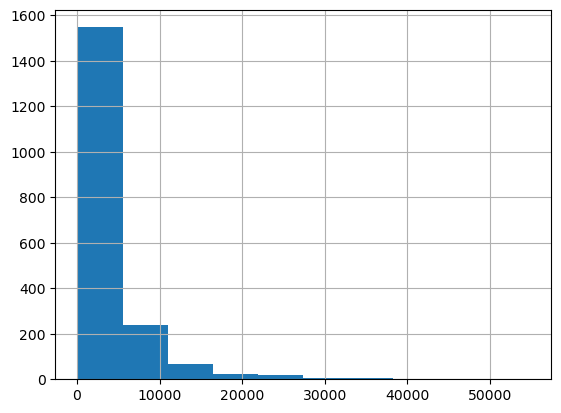

In [57]:
clean_df['current_price'].hist()

In [59]:
##exporrting the cleaned data to a csv
clean_df.to_csv("cleaned_data.csv", index = False)